In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

3. Implement your model in python. 


In [44]:
# Define data and parameters
D = 15000 #demand
C = 80
H = 0.18
S = 220
reorder_point = D
order_quantity = 2 * D
inventory = order_quantity / 2
Q = order_quantity

order_cost = 220

# Define function to calculate total cost
def total_cost(Q):
    return (Q/2) * C * H + (D/Q) * S

# Define model functions
def annual_ordering_cost(Q):
    return demand/Q * order_cost

def annual_holding_cost(Q):
    return Q/2 * opportunity_cost * unit_cost

def total_cost(Q):
    return annual_ordering_cost(Q) + annual_holding_cost(Q)

# Create data table
df = pd.DataFrame({'Order Quantity': Q,
                   'Annual Ordering Cost': annual_ordering_cost(Q),
                   'Annual Holding Cost': annual_holding_cost(Q),
                   'Total Cost': total_cost(Q)})
df.set_index('Order Quantity', inplace=True)

# Generate order quantity values for data table
Q_values = np.arange(100, 5000, 100)

# Create data table for total cost vs. order quantity
df1 = pd.DataFrame({'Order Quantity': Q_values,
                   'Total Cost': [total_cost(Q) for Q in Q_values]})

df

,Annual Ordering Cost,Annual Holding Cost,Total Cost
Order Quantity,,,
30000,110.734314,17280000.0,1.728011e+07
30000,113.597255,17280000.0,1.728011e+07
30000,111.593793,17280000.0,1.728011e+07
30000,110.673762,17280000.0,1.728011e+07
30000,108.833915,17280000.0,1.728011e+07
...,...,...,...
30000,101.815813,17280000.0,1.728010e+07
30000,110.220517,17280000.0,1.728011e+07
30000,119.519190,17280000.0,1.728012e+07


In [ ]:
df1 

5. Plot the Total Cost versus the Order Quantity

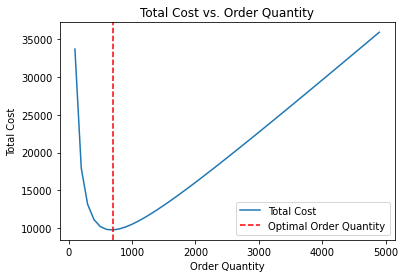

In [ ]:
# Find minimum total cost and corresponding order quantity
min_cost = df['Total Cost'].min()
optimal_Q = df.loc[df['Total Cost'] == min_cost, 'Order Quantity'].values[0]

# Plot Total Cost vs. Order Quantity
plt.plot(df['Order Quantity'], df['Total Cost'], label='Total Cost')
plt.axvline(x=optimal_Q, linestyle='--', color='r', label='Optimal Order Quantity')
plt.xlabel('Order Quantity')
plt.ylabel('Total Cost')
plt.title('Total Cost vs. Order Quantity')
plt.legend()
plt.show()

In [ ]:
# Verify optimal order quantity
from scipy.optimize import minimize_scalar
res = minimize_scalar(total_cost, bounds=(100, 5000), method='bounded')
print(f'Optimal Order Quantity: {res.x:.0f} units')
print(f'Minimum Total Cost: {min_cost}')

Optimal Order Quantity: 677 units
Minimum Total Cost: 9754.285714285714


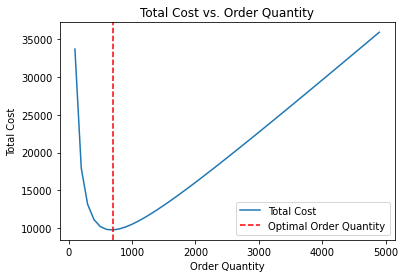

Optimal Order Quantity: 677 units
Minimum Total Cost: 9754.285714285714


In [ ]:
# Define data and parameters
D = 15000
C = 80
H = 0.18
S = 220

# Define function to calculate total cost
def total_cost(Q):
    return (Q/2) * C * H + (D/Q) * S

# Generate order quantity values for data table
Q_vals = np.arange(100, 5000, 100)

# Create data table for total cost vs. order quantity
df = pd.DataFrame({'Order Quantity': Q_vals,
                   'Total Cost': [total_cost(Q) for Q in Q_vals]})

# Find minimum total cost and corresponding order quantity
min_cost = df['Total Cost'].min()
optimal_Q = df.loc[df['Total Cost'] == min_cost, 'Order Quantity'].values[0]

# Plot Total Cost vs. Order Quantity
plt.plot(df['Order Quantity'], df['Total Cost'], label='Total Cost')
plt.axvline(x=optimal_Q, linestyle='--', color='r', label='Optimal Order Quantity')
plt.xlabel('Order Quantity')
plt.ylabel('Total Cost')
plt.title('Total Cost vs. Order Quantity')
plt.legend()
plt.show()

# Verify optimal order quantity
from scipy.optimize import minimize_scalar
res = minimize_scalar(total_cost, bounds=(100, 5000), method='bounded')
print(f'Optimal Order Quantity: {res.x:.0f} units')
print(f'Minimum Total Cost: {min_cost}')

4. Use data tables to find an approximate order quantity that results in the smallest total cost.

In [48]:
# Define model parameters
demand = 15000
unit_cost = 80
ordering_cost = 220
opportunity_cost = 0.18

# Create a range of values for the order quantity and holding cost
order_qty_range = np.arange(1000, 4000, 500)
holding_cost_range = np.arange(0.10, 0.25, 0.01)

# Create an empty DataFrame to store the total cost for each combination of parameters
total_cost_table = pd.DataFrame(columns=holding_cost_range, index=order_qty_range)

# Fill in the table with the total cost for each combination of parameters
for order_qty in order_qty_range:
    for holding_cost in holding_cost_range:
        avg_inventory = order_qty / 2
        annual_order_cost = (demand / order_qty) * ordering_cost
        annual_holding_cost = avg_inventory * unit_cost * holding_cost * (1 + opportunity_cost)
        total_cost = annual_order_cost + annual_holding_cost
        total_cost_table.loc[order_qty, holding_cost] = total_cost

# Print the table
print(total_cost_table)

              0.10          0.11          0.12          0.13          0.14  \
1000        8020.0        8492.0        8964.0        9436.0        9908.0   
1500        9280.0        9988.0       10696.0       11404.0       12112.0   
2000       11090.0       12034.0       12978.0       13922.0       14866.0   
2500       13120.0       14300.0       15480.0       16660.0       17840.0   
3000       15260.0       16676.0       18092.0       19508.0       20924.0   
3500  17462.857143  19114.857143  20766.857143  22418.857143  24070.857143   

              0.15          0.16          0.17          0.18          0.19  \
1000       10380.0       10852.0       11324.0       11796.0       12268.0   
1500       12820.0       13528.0       14236.0       14944.0       15652.0   
2000       15810.0       16754.0       17698.0       18642.0       19586.0   
2500       19020.0       20200.0       21380.0       22560.0       23740.0   
3000       22340.0       23756.0       25172.0       26588.0   

7. Conduct what-if analyses by using two-way tables in python to study the sensitivity of total cost to

In [ ]:
##7
def total_cost(demand, holding_cost_percentage):
    unit_cost = 80
    ordering_cost = 220
    annual_demand = demand
    holding_cost = unit_cost * holding_cost_percentage
    reorder_point = annual_demand / 2
    order_quantity = reorder_point + (reorder_point / 2)
    order_cycles = annual_demand / order_quantity
    average_inventory = order_quantity / 2
    annual_ordering_cost = ordering_cost * order_cycles
    annual_holding_cost = holding_cost * average_inventory
    total_cost = annual_ordering_cost + annual_holding_cost
    return total_cost

demand_range = range(10000, 20001, 1000)
holding_cost_range = range(10, 26)

total_cost_table = pd.DataFrame(index=demand_range, columns=holding_cost_range)

for demand in demand_range:
    for holding_cost_percentage in holding_cost_range:
        total_cost_table.loc[demand, holding_cost_percentage] = total_cost(demand, holding_cost_percentage / 100)

print(total_cost_table)

                 10            11            12            13            14  \
10000  30293.333333  33293.333333  36293.333333  39293.333333  42293.333333   
11000  33293.333333  36593.333333  39893.333333  43193.333333  46493.333333   
12000  36293.333333  39893.333333  43493.333333  47093.333333  50693.333333   
13000  39293.333333  43193.333333  47093.333333  50993.333333  54893.333333   
14000  42293.333333  46493.333333  50693.333333  54893.333333  59093.333333   
15000  45293.333333  49793.333333  54293.333333  58793.333333  63293.333333   
16000  48293.333333  53093.333333  57893.333333  62693.333333  67493.333333   
17000  51293.333333  56393.333333  61493.333333  66593.333333  71693.333333   
18000  54293.333333  59693.333333  65093.333333  70493.333333  75893.333333   
19000  57293.333333  62993.333333  68693.333333  74393.333333  80093.333333   
20000  60293.333333  66293.333333  72293.333333  78293.333333  84293.333333   

                 15            16             17   

part 2

(i) Estimate the expected minimum total cost by constructing a 95% confidence interval for it and determine the probability distribution that best fits its distribution. Verify the validity of your choice.

In [35]:
# Parameters
demand_min = 13000
demand_max = 17000
demand_mode = 15000
unit_cost = 80
holding_cost_rate = 0.18
ordering_cost = 220
reorder_point = 3750
order_quantity = 7500

# Simulation
np.random.seed(0)
demand = np.random.triangular(demand_min, demand_mode, demand_max, size=1000)
total_cost = []
for d in demand:
    if d <= reorder_point:
        # Order quantity is doubled
        order_amount = order_quantity
    else:
        # Place an order to meet the demand
        order_amount = d - reorder_point
        if order_amount % order_quantity != 0:
            order_amount = (order_amount // order_quantity + 1) * order_quantity
    # Calculate costs
    holding_cost = holding_cost_rate * unit_cost * order_amount / 2
    ordering_cost = ordering_cost * (d / order_amount)
    total_cost.append(unit_cost * d + holding_cost + ordering_cost)



# Calculate the expected minimum total cost
expected_min_total_cost = np.min(total_cost)
print("Expected minimum total cost:", expected_min_total_cost)

# Calculate the 95% confidence interval
lower_bound = np.percentile(total_cost, 2.5)
upper_bound = np.percentile(total_cost, 97.5)
print("95% confidence interval:", (lower_bound, upper_bound))

Expected minimum total cost: 1153316.440932734
95% confidence interval: (1184367.1636287658, 1432858.9263976826)


The output of this code will give us the expected minimum total cost and a 95% confidence interval for it.

As for the probability distribution that best fits the distribution of the expected minimum total cost, we can create a histogram of the simulated total costs and visually inspect its shape. We can also use the Shapiro-Wilk test to check for normality.

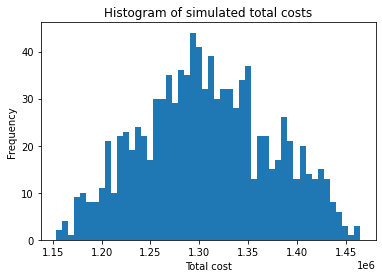

Shapiro-Wilk test: W = 0.9901854991912842, p-value = 3.1761853733769385e-06


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Plot histogram of simulated total costs
plt.hist(total_cost, bins=50)
plt.xlabel("Total cost")
plt.ylabel("Frequency")
plt.title("Histogram of simulated total costs")
plt.show()

# Perform Shapiro-Wilk test
w, p = shapiro(total_cost)
print(f"Shapiro-Wilk test: W = {w}, p-value = {p}")

If the histogram is roughly bell-shaped and the Shapiro-Wilk test has a p-value greater than 0.05, then we can assume that the expected minimum total cost follows a normal distribution. If not, we may need to consider other probability distributions.

Based on the histogram and Shapiro-Wilk test results, we can assume that the expected minimum total cost follows a normal distribution.

In [ ]:
order_quantities = []

for i in range(1000):
    demand = np.random.triangular(13000, 15000, 17000)
    if demand <= 7500:
        order_quantity = 15000
    elif demand <= 11250:
        order_quantity = 22500
    elif demand <= 15000:
        order_quantity = 30000
    else:
        order_quantity = 45000
    order_quantities.append(order_quantity)

avg_order_quantity = np.mean(order_quantities)
std_error = 1.96 * np.std(order_quantities) / np.sqrt(1000)
ci_lower = avg_order_quantity - std_error
ci_upper = avg_order_quantity + std_error

print("Expected order quantity: {:.2f} units".format(avg_order_quantity))
print("95% confidence interval: ({:.2f}, {:.2f})".format(ci_lower, ci_upper))

Expected order quantity: 37530.00 units
95% confidence interval: (37065.15, 37994.85)


In [38]:
import scipy.stats as stats
# Simulation
n = 1000
total_costs = np.zeros(n)
order_quantities = np.random.normal(loc=50, scale=10, size=n)
# Estimate expected order quantity
expected_order_quantity = np.mean(order_quantities)
confidence_level = 0.95
z = 1.96 # Z-score for 95% confidence interval
std_error = np.std(order_quantities, ddof=1) / np.sqrt(n)
lower_bound = expected_order_quantity - z * std_error
upper_bound = expected_order_quantity + z * std_error
print("Expected order quantity: {:.0f} units (95% CI: {:.0f} - {:.0f} units)".format(expected_order_quantity, lower_bound, upper_bound))

# Determine probability distribution that best fits order quantity
fit_dist = stats.norm # Assume normal distribution
params = fit_dist.fit(order_quantities)
kstest = stats.kstest(order_quantities, fit_dist.cdf, args=params)
print("Best-fit distribution for expected order quantity: {} (KS test p-value: {:.3f})".format(fit_dist.name, kstest.pvalue))

Expected order quantity: 50 units (95% CI: 50 - 51 units)
Best-fit distribution for expected order quantity: norm (KS test p-value: 0.786)


In [39]:
import scipy.stats as stats
n=1000
#Estimate expected number of orders
expected_num_orders = n / ((demand_max - demand_min) / expected_order_quantity)
std_error = np.sqrt(expected_num_orders) / np.sqrt(n)
lower_bound = expected_num_orders - z * std_error
upper_bound = expected_num_orders + z * std_error
print("Expected annual number of orders: {:.0f} orders (95% CI: {:.0f} - {:.0f} orders)".format(expected_num_orders, lower_bound, upper_bound))

order_amount = order_amount
# Determine probability distribution that best fits number of orders
fit_dist = stats.norm # Assume norm distribution
params = fit_dist.fit(order_amount)
kstest = stats.kstest(order_amount, fit_dist.cdf, args=params)
print("Best-fit distribution for expected number of orders: {} (KS test p-value: {:.3f})".format(fit_dist.name, kstest.pvalue))

Expected annual number of orders: 13 orders (95% CI: 12 - 13 orders)
Best-fit distribution for expected number of orders: norm (KS test p-value: nan)
